# Businss Understanding

## Business Objective

## Data Sources

## Background Info - King County

- King County, Seattle Washington Wiki: https://en.wikipedia.org/wiki/King_County,_Washington
- The population was 2,252,782 in the 2019 census estimate, making it the most populous county in Washington, and the 12th-most populous in the United States. 
- King County is one of three Washington counties that are included in the Seattle–Tacoma–Bellevue metropolitan statistical area.
- About two-thirds of King County's population lives in Seattle's suburbs.
- King County has a total area of 2,307 square miles (5,980 km2), of which 2,116 square miles (5,480 km2) is land and 191 square miles (490 km2) (8.3%) is water.
- The highest point in the county is Mount Daniel at 7,959 feet (2,426 meters) above sea level.

### King County Map

![King County Seattle Map](images/King_County_Map.png)

## Executive Summary

# Data Profiling

## Import Libraries

In [1]:
# Import libraries required to load, transform, analyze and plot data
import numpy as np
import pandas as pd
from pandas.plotting import table
import matplotlib.pyplot as plt
import matplotlib.colors as pltcol
import matplotlib.ticker as ticker
import seaborn as sns
import math
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.tools.eval_measures as ev
from sklearn.model_selection import train_test_split
import scipy.stats as stats

# Set display option to remove scientific notation and restrictions on df rows/columns display
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [ ]:
# Add jupytertheme to this notebook for better readability
!jt -t onedork -fs 95 -altp -tfs 11 -nfs 115 -cellw 88% -T

## King County Housing Data

### KC Data Dictionary

**Data Dictionary Kings County Data Set**
 - id - unique identified for a house
 - dateDate - house was sold
 - pricePrice -  is prediction target
 - bedroomsNumber -  of Bedrooms/House
 - bathroomsNumber -  of bathrooms/bedrooms
 - sqft_livingsquare -  footage of the home
 - sqft_lotsquare -  footage of the lot
 - floorsTotal -  floors (levels) in house
 - waterfront - House which has a view to a waterfront
 - view - An index from 0 to 4 of how good the view of the property was
 - condition - How good the condition is ( Overall )
 - grade - overall grade given to the housing unit, based on King County grading system
 - sqft_above - square footage of house apart from basement
 - sqft_basement - square footage of the basement
 - yr_built - Built Year
 - yr_renovated - Year when house was renovated
 - zipcode - zip
 - lat - Latitude coordinate
 - long - Longitude coordinate
 - sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
 - sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


<a href="https://www.kingcounty.gov/depts/assessor/Reports/area-reports/2017/residential-westcentral/~/media/depts/assessor/documents/AreaReports/2017/Residential/013.ashx">King County Condition and Building Grade Scoring</a>

**Condition: Relative to Age and Grade**
- 1= Poor Many repairs needed. Showing serious deterioration.
- 2= Fair Some repairs needed immediately. Much deferred maintenance.
- 3= Average Depending upon age of improvement; normal amount of upkeep for the age of the home.
- 4= Good Condition above the norm for the age of the home. Indicates extra attention and care has been taken to maintain.
- 5= Very Good Excellent maintenance and updating on home. Not a total renovation.

**Residential Building Grades**
- Grades 1 - 3 Falls short of minimum building standards. Normally cabin or inferior structure.
- Grade 4 Generally older low quality construction. Does not meet code.
- Grade 5 Lower construction costs and workmanship. Small, simple design.
- Grade 6 Lowest grade currently meeting building codes. Low quality materials, simple designs.
- Grade 7 Average grade of construction and design. Commonly seen in plats and older subdivisions.
- Grade 8 Just above average in construction and design. Usually better materials in both the exterior and interior finishes.
- Grade 9 Better architectural design, with extra exterior and interior design and quality.
- Grade 10 Homes of this quality generally have high quality features. Finish work is better, and more design quality is seen in the floor plans and larger square footage.
- Grade 11 Custom design and higher quality finish work, with added amenities of solid woods, bathroom fixtures and more luxurious options.
- Grade 12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
- Grade 13 Generally custom designed and built. Approaching the Mansion level. Large amount of highest quality cabinet work, wood trim and marble; large entries. 

### Dataframe Basics

#### Load File

In [2]:
# Load Kings County data set (primary driver dataframe)
kc = pd.read_csv('data/kc_house_data.csv')
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,"221,900.00",3,1.00,1180,5650,1.00,nan,0.00,3,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,"538,000.00",3,2.25,2570,7242,2.00,0.00,0.00,3,7,2170,400.0,1951,"1,991.00",98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,"180,000.00",2,1.00,770,10000,1.00,0.00,0.00,3,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,"604,000.00",4,3.00,1960,5000,1.00,0.00,0.00,5,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,"510,000.00",3,2.00,1680,8080,1.00,0.00,0.00,3,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


#### Info/Describe

In [3]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**Notes**
- Non-nulls look really good, most fields don't have issues
- Only waterfront and year renovated have significant nulls, view has a few. Fill with 0's on all. Change year renovated to int64.
- Change zipcode to string
- Why is sqft_basement an object?

#### Data Cleaning

In [4]:
# Check Waterfront value distribution - only 146 have view.
kc.waterfront.value_counts()

0.00    19075
1.00      146
Name: waterfront, dtype: int64

In [5]:
# Fill nulls with 0 for waterfront given unlikely waterfront status
kc.waterfront.fillna(0, inplace=True)

In [6]:
# Check View value distribution - only ~2K have view.
kc.view.value_counts()

0.00    19422
2.00      957
3.00      508
1.00      330
4.00      317
Name: view, dtype: int64

In [7]:
# Check View value distribution - only ~2K have view.
kc.floors.value_counts()

1.00    10673
2.00     8235
1.50     1910
3.00      611
2.50      161
3.50        7
Name: floors, dtype: int64

In [8]:
# Fill nulls with 0 for View given only 5 nulls
kc.view.fillna(0, inplace=True)

In [9]:
# Check total renovation counts to assess frequency
renovations = kc[(kc.yr_renovated != 0) & (kc.yr_renovated.isna()==False)]
renovations.yr_renovated.count() # Only 744 renovations

744

In [10]:
# Fill nulls with 0 for year renovated for consistency; 0 indicates no basement
kc.yr_renovated.fillna(0, inplace=True)

In [11]:
# Check number of zip codes present in data
len(pd.unique(kc.zipcode))

70

In [12]:
# Check Sq Ft Basement value distribution - has ? and float
kc.sqft_basement.value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [13]:
# Fill nulls with 0 for View given only 5 nulls
kc.sqft_basement.replace('?', 0, inplace=True)

#### Data Type Conversions

In [14]:
# Data type conversions
kc['date']= pd.to_datetime(kc['date'])
kc['zipcode']=kc['zipcode'].astype('category')
kc['sqft_basement']=kc['sqft_basement'].astype(float).astype(int)
kc['yr_renovated']=kc['yr_renovated'].astype(int)

In [15]:
# Check data type changes
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int64         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

#### Describe

In [16]:
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,"21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00"
mean,"4,580,474,287.77","540,296.57",3.37,2.12,"2,080.32","15,099.41",1.49,0.01,0.23,3.41,7.66,"1,788.60",285.72,"1,971.00",68.76,47.56,-122.21,"1,986.62","12,758.28"
std,"2,876,735,715.75","367,368.14",0.93,0.77,918.11,"41,412.64",0.54,0.08,0.76,0.65,1.17,827.76,439.82,29.38,364.04,0.14,0.14,685.23,"27,274.44"
min,"1,000,102.00","78,000.00",1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,"1,900.00",0.00,47.16,-122.52,399.00,651.00
25%,"2,123,049,175.00","322,000.00",3.00,1.75,"1,430.00","5,040.00",1.00,0.00,0.00,3.00,7.00,"1,190.00",0.00,"1,951.00",0.00,47.47,-122.33,"1,490.00","5,100.00"
50%,"3,904,930,410.00","450,000.00",3.00,2.25,"1,910.00","7,618.00",1.50,0.00,0.00,3.00,7.00,"1,560.00",0.00,"1,975.00",0.00,47.57,-122.23,"1,840.00","7,620.00"
75%,"7,308,900,490.00","645,000.00",4.00,2.50,"2,550.00","10,685.00",2.00,0.00,0.00,4.00,8.00,"2,210.00",550.00,"1,997.00",0.00,47.68,-122.12,"2,360.00","10,083.00"
max,"9,900,000,190.00","7,700,000.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,4.00,5.00,13.00,"9,410.00","4,820.00","2,015.00","2,015.00",47.78,-121.31,"6,210.00","871,200.00"


**Notes on Describe**
- Price: skewed right. Might be outlier with 7.7M
- Bedrooms: Outlier at 33 (possibly more?)
- Sqft_Lot: Obvious outlier at 1.6M, and mean is nearly double median.
- Waterfront: Sparsely populated
- Yr_Renovated: Small proportion of homes given 75th percentile is 0

#### Log Transforms

In [17]:
# Check column outliers and skew; testing normality
def check_normality(df, col, bins=20):
    '''Takes in dataframe and column, provides 4th positive std_dev, skew and kurtosis for normality assessment'''
    std4 = round(df[col].mean()+4*df[col].std())
    std4_cnt = len(df[df[col]>std4])
    print(f'{col} 4 Std Dev: {std4} | Home Counts above this lot size: {std4_cnt} | Skew: {df[col].skew()} | Kurtosis: {df[col].kurtosis()}')
    df[col].hist(figsize=(8,4), bins=bins)
    return

In [18]:
# Create function to generate log transform columns for variables that are skewed
def create_log(df, column, col_pos=0, bins=20):
    '''Takes in dataframe, column and number of bins. Creates new log column and histograms to review normality of both columns'''
    col_log_name = f'{column}_log'
    df.insert(loc=col_pos, column=col_log_name, value=np.log(df[column]))
#     df[col_log_name] = np.log(df[column])
    df[[column, col_log_name]].hist(figsize=(12,4), bins=bins)
    plt.show()
    print(f'{col_log_name} skew: {df[col_log_name].skew()}')
    print(f'{col_log_name} kurtosis: {df[col_log_name].kurtosis()}')
    return

##### Price Log

price 4 Std Dev: 2009769.0 | Home Counts above this lot size: 198 | Skew: 4.023364652271239 | Kurtosis: 34.54135857673376


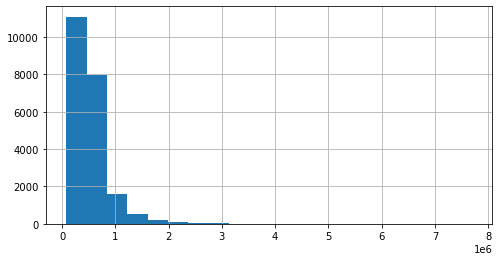

In [19]:
check_normality(kc, 'price', bins=20)

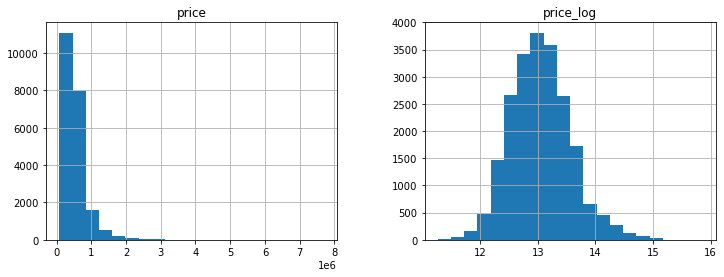

price_log skew: 0.4310041773299232
price_log kurtosis: 0.691048515911131


In [20]:
# Creating price log column given skew
create_log(kc, 'price', col_pos=3, bins=20)

**Notes of Price Log**
- Price is highly skewed with 198 values more than 4 standard deviations from the mean
- Going ahead and creating price_log column and as shown above, it's relatively normal with little skew.
- Price log looks great, 0.4 skew and 0.7 kurtosis, should hold up much better in linear models.
- Price_log will be available for use in Model section

##### Lot Size Log

sqft_lot 4 Std Dev: 180750.0 | Home Counts above this lot size: 291 | Skew: 13.072603567136046 | Kurtosis: 285.49581188504857


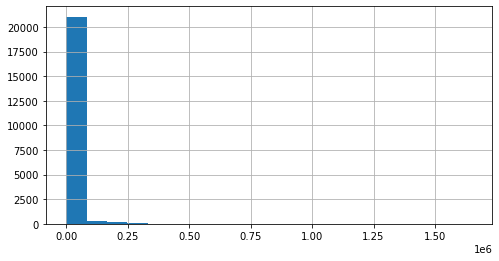

In [21]:
check_normality(kc, 'sqft_lot', bins=20)

**Notes on Lot Size**
- 291 outliers above 4 standard deviations "mega lots"
- Usually lot size should be a significant variable in price, going transform or adjust for these mega size lots

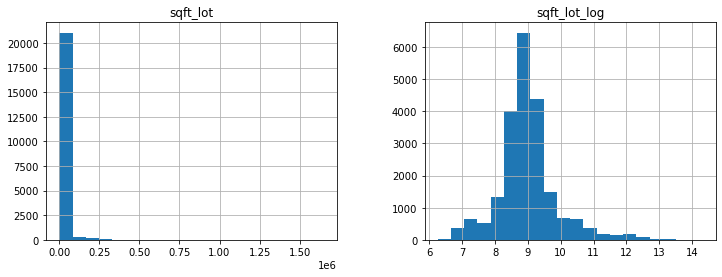

sqft_lot_log skew: 0.9625003856495555
sqft_lot_log kurtosis: 3.3300228478097806


In [22]:
# Creating lot_size log column given skew
create_log(kc, 'sqft_lot', col_pos=8, bins=20)

**Notes on Lot Size Log**
- Outliers make lot_size highly positively skewed
- Log function brings to normal, almost perfect with Skew near 1 and Kurtosis near 3.

##### Sqft Living Log

sqft_living 4 Std Dev: 5753.0 | Home Counts above this lot size: 94 | Skew: 1.473215455425834 | Kurtosis: 5.252101950846816


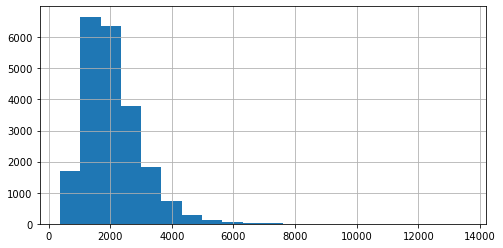

In [23]:
check_normality(kc, 'sqft_living', bins=20)

**Notes on Square Foot Living**
- 94 outliers above 4 standard deviations "mega homes"
- Let's create a log transform to see how normal we can get since sqft_living will be one of our top predictors

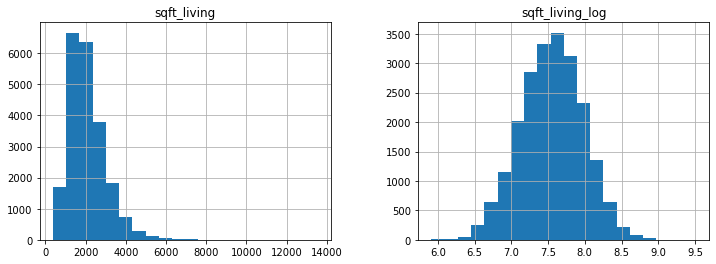

sqft_living_log skew: -0.02736196977684956
sqft_living_log kurtosis: -0.07903824710238583


In [24]:
create_log(kc, 'sqft_living', col_pos=7, bins=20)

##### sqft_living15

sqft_living15 4 Std Dev: 4728.0 | Home Counts above this lot size: 55 | Skew: 1.1068753971161713 | Kurtosis: 1.591732789053459


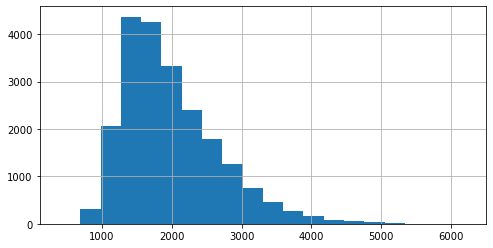

In [25]:
check_normality(kc, 'sqft_living15', bins=20)

**Notes on Sq Ft Living 15**
- Sqft_living15 slightly skewed positively, but not going to pursue log transform at this point.

##### Sqft Lot 15 Log

sqft_lot15 4 Std Dev: 121856.0 | Home Counts above this lot size: 260 | Skew: 9.524361965117942 | Kurtosis: 151.39566252348297


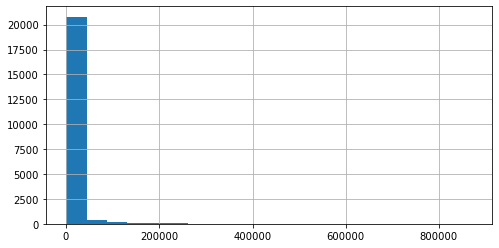

In [26]:
check_normality(kc, 'sqft_lot15', bins=20)

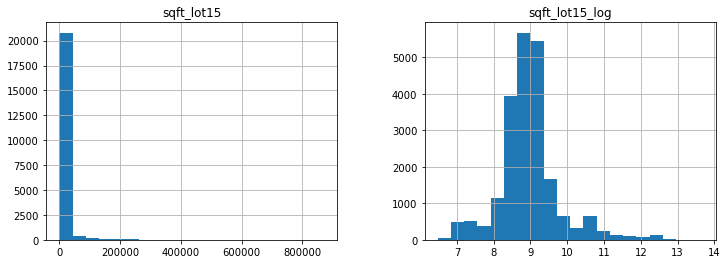

sqft_lot15_log skew: 0.9662023077970389
sqft_lot15_log kurtosis: 3.564328654399476


In [29]:
create_log(kc, 'sqft_lot15', col_pos=24, bins=20)

**Notes on Sqft Lot 15**
- Tons of outliers, highly skewed like lot size.
- Log transformation brings into normal shape with near 1 skew and 3.6 kurosis

#### Basic Features

In [31]:
# Create indicator column for homes showing renovation years (1 = Renovation)
kc.insert(loc=19, column='renovation_ind', value=np.where((kc.yr_renovated.isnull()) | (kc.yr_renovated==0), 0, 1))
kc.head() 

,id,date,price,price_log,bedrooms,bathrooms,sqft_living,sqft_living_log,sqft_lot,sqft_lot_log,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,renovation_ind,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot15_log
0,7129300520,2014-10-13,"221,900.00",12.31,3,1.00,1180,7.07,5650,8.64,1.00,0.00,0.00,3,7,1180,0,1955,0,0,98178,47.51,-122.26,1340,5650,8.64
1,6414100192,2014-12-09,"538,000.00",13.20,3,2.25,2570,7.85,7242,8.89,2.00,0.00,0.00,3,7,2170,400,1951,1991,1,98125,47.72,-122.32,1690,7639,8.94
2,5631500400,2015-02-25,"180,000.00",12.10,2,1.00,770,6.65,10000,9.21,1.00,0.00,0.00,3,6,770,0,1933,0,0,98028,47.74,-122.23,2720,8062,8.99
3,2487200875,2014-12-09,"604,000.00",13.31,4,3.00,1960,7.58,5000,8.52,1.00,0.00,0.00,5,7,1050,910,1965,0,0,98136,47.52,-122.39,1360,5000,8.52
4,1954400510,2015-02-18,"510,000.00",13.14,3,2.00,1680,7.43,8080,9.00,1.00,0.00,0.00,3,8,1680,0,1987,0,0,98074,47.62,-122.05,1800,7503,8.92


In [32]:
# Create indicator column for homes with basement based on non-zero sqft
kc.insert(loc=17, column='basement_ind', value=np.where(kc.sqft_basement==0, 0, 1))
kc.head() 

,id,date,price,price_log,bedrooms,bathrooms,sqft_living,sqft_living_log,sqft_lot,sqft_lot_log,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,basement_ind,yr_built,yr_renovated,renovation_ind,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot15_log
0,7129300520,2014-10-13,"221,900.00",12.31,3,1.00,1180,7.07,5650,8.64,1.00,0.00,0.00,3,7,1180,0,0,1955,0,0,98178,47.51,-122.26,1340,5650,8.64
1,6414100192,2014-12-09,"538,000.00",13.20,3,2.25,2570,7.85,7242,8.89,2.00,0.00,0.00,3,7,2170,400,1,1951,1991,1,98125,47.72,-122.32,1690,7639,8.94
2,5631500400,2015-02-25,"180,000.00",12.10,2,1.00,770,6.65,10000,9.21,1.00,0.00,0.00,3,6,770,0,0,1933,0,0,98028,47.74,-122.23,2720,8062,8.99
3,2487200875,2014-12-09,"604,000.00",13.31,4,3.00,1960,7.58,5000,8.52,1.00,0.00,0.00,5,7,1050,910,1,1965,0,0,98136,47.52,-122.39,1360,5000,8.52
4,1954400510,2015-02-18,"510,000.00",13.14,3,2.00,1680,7.43,8080,9.00,1.00,0.00,0.00,3,8,1680,0,0,1987,0,0,98074,47.62,-122.05,1800,7503,8.92


#### Outliers & Filters

In [33]:
# Dropping rows by index for outliers and other conditions
mask = kc.loc[kc['bedrooms']>20].index
kc.drop(mask, inplace=True)

### Sales Analysis

#### Sales Time Series

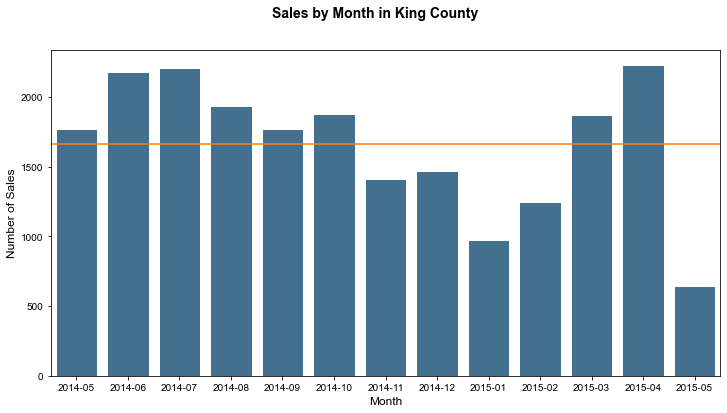

In [34]:
# Plot number of sales by month for King County home sales data
kc['sales_cnt']=1 # dummy variable to sum sales
kc['year_month'] = kc.date.dt.to_period('m') # transform date into month
df_grp = kc.groupby(['year_month'])['sales_cnt'].sum().reset_index()

# Create barplot with average line
f, ax = plt.subplots(1, 1, figsize=(12, 6))
f.suptitle('Sales by Month in King County', fontsize=14, fontweight ='bold')
sns.set_style("dark")
ax = sns.barplot(data=df_grp, x='year_month', y='sales_cnt', color='tab:blue', saturation=.5)
ax.axhline(df_grp.sales_cnt.mean(), color='tab:orange')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Number of Sales', fontsize=12)
plt.show()

**Notes on Sales Trend**
- Total sales transations of 21,597 spread across 13 months with 1,661 average/month in sample
- May 2015 looks to be a partial month, may excluded it to have a complete 1 year of data (2014-05 through 2015-04)
- Sales time series exhibits expected seasonality in Spring/Summer with slower Winter months

#### Sales By Year Built

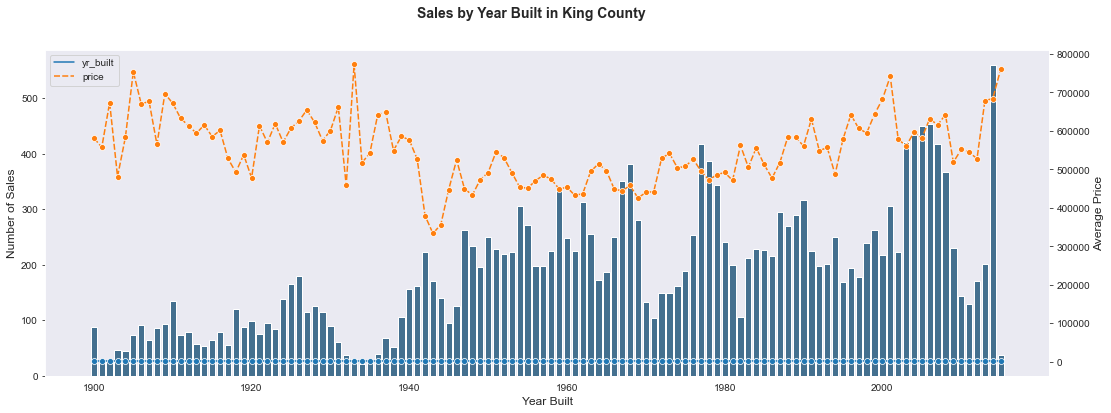

In [35]:
# Plot number of sales by month for King County home sales data
df_grp = kc.groupby(['yr_built'])['sales_cnt'].sum().reset_index()
df_grp2 = kc.groupby(['yr_built'])['price'].mean().reset_index()

# Create barplot with average line
f, ax = plt.subplots(figsize=(18, 6)) 
f.suptitle('Sales by Year Built in King County', fontsize=14, fontweight ='bold')
sns.set_style("dark")
ax = sns.barplot(data=df_grp, x='yr_built', y='sales_cnt', color='tab:blue', saturation=.5, ax=ax)
ax.set_xlabel('Year Built', fontsize=12)
ax.set_ylabel('Number of Sales', fontsize=12)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax2 = ax.twinx()
ax2 = sns.lineplot(data=df_grp2, marker='o', ax=ax2)
ax2.set_ylabel('Average Price', fontsize=12)
plt.show()

**Notes on Sales by Year Built**
- Wide range distribution going back to 1900, increasingly steadily by decade
- Initially use built year as predictor but could consider converting to decade to simplify if still correlates
- Average prices are higher for really old (historic) or newer homes

### Category Profiles

#### Plot Functions

In [36]:
# Define function to generate Top N values, counts and % total for a column
def topn_count(df, column, topn):
    c = df[column].value_counts(dropna=False)
    p = df[column].value_counts(dropna=False, normalize=True).mul(100).round(1).astype(str) + '%'
    cp = (100*df.groupby(column).size().cumsum()/df.groupby(column).size().sum()).round(1).astype(str) + '%'
    print(f'Top 10 Counts By {column.title()}')
    return pd.concat([c, p ,cp], axis=1, keys=['Counts', '%', 'Cum %']).iloc[:topn]

In [ ]:
#  topn_count(kc, 'bedrooms', 10)

In [39]:
# Define function to generate 3 plots for X and Y columns in a dataframe: Histogram, Price Box Plot and Top N % Distribution
def distplots(df, xcol, ycol, topn):
    # Set a figure with 3 subplots and figure-level settings
    f, (ax,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(18, 6))
    sns.set_theme(style='ticks', palette='deep')
    sns.set_style('whitegrid')
    f.suptitle('Column Value Distributions', fontsize=14, fontweight ='bold')
    f.tight_layout(pad=3)
    
    # Subplot 1 - Histogram by desired xcol showing probability %
    ax = plt.subplot2grid((1, 7), (0, 0), colspan=2)
    ax = sns.histplot(data=df, x=xcol, color='skyblue', stat='probability', discrete = True, ax=ax)
    ax.set_title('Histogram')

    # Subplot 2 - Scatter plot xcol vs. ycol
    ax2 = plt.subplot2grid((1, 7), (0, 2), colspan=2)
    ax2 = sns.scatterplot(df[xcol], df[ycol])
    ax2.set_title(f'{ycol.title()} vs {xcol.title()} Scatterplot')
#     ax2.set_xlabel(column)
#     ax2.set_ylabel('Sale Price in $100,000')
    
    # Subplot 3 - Boxplot by desired xcol against ycol (e.g. price) to see distributions grouped by xcol
    ax3 = plt.subplot2grid((1, 7), (0, 4), colspan=2)
    ax3 = sns.boxplot(data=df, x=xcol, y=ycol, showfliers=False, ax=ax3) # Excludes outliers for presentability 
    ax3.set_title('Boxplot')

    # Calculate medians and number of observations per group for use in positioning labels on plot
    medians = df.groupby([xcol])[ycol].median().values
    nobs = df[xcol].value_counts(sort=False).sort_index().values
    nobs = [str(x) for x in nobs.tolist()]
    nobs = ["n: " + i for i in nobs]

    # Add number of observations to the boxplot for indication of each box's relative likelihood
    pos = range(len(nobs))
    for tick, label in zip(pos, ax2.get_xticklabels()):
        ax3.text(pos[tick], medians[tick] + 0.2, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='bold')
    
    # Subplot 4 - Add dataframe top N value counts and % of group as a table in 3rd plot
    top = topn_count(df, xcol, topn)
    ax4 = plt.subplot2grid((1, 7), (0, 6))
    ax4.table(cellText=top.values,rowLabels=top.index, colLabels=top.columns, cellLoc = 'center', rowLoc = 'center', loc='center')
    ax4.axis("off")
    ax4.set_title('Top Values')
    plt.show()

In [ ]:
# data.hist(figsize=(18,15), bins='auto');

#### Bedrooms

/Users/cutterback/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Top 10 Counts By Bedrooms


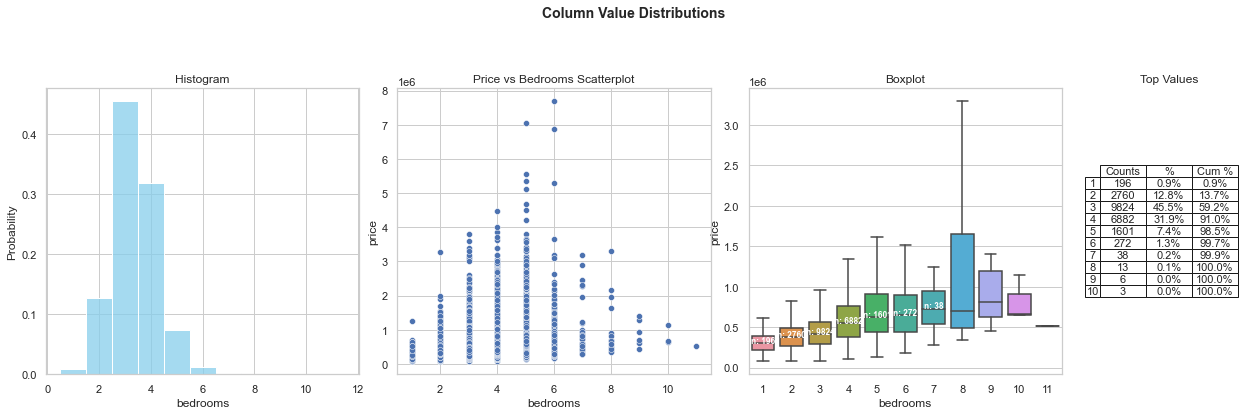

In [40]:
distplots(kc, 'bedrooms', 'price', 10)

**Notes on Bedrooms**
- One outlier at 33 BR excluded for graph presentability
- Mode is 3 BR and 78% are 3/4 BR. Only 1.5% higher than 5 BR and only 1% at 1 BR.
- Limiting to 1-6 BR looks relatively normal, might not need log transformation. This would mean dropping 0.3% of the data from modeling.
- Median price increases from 1-7 BRs, assume strong correlation. The IQR upper whisker increases more than lower whisker for higher bedrooms.

#### Bathrooms

/Users/cutterback/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Top 10 Counts By Bathrooms


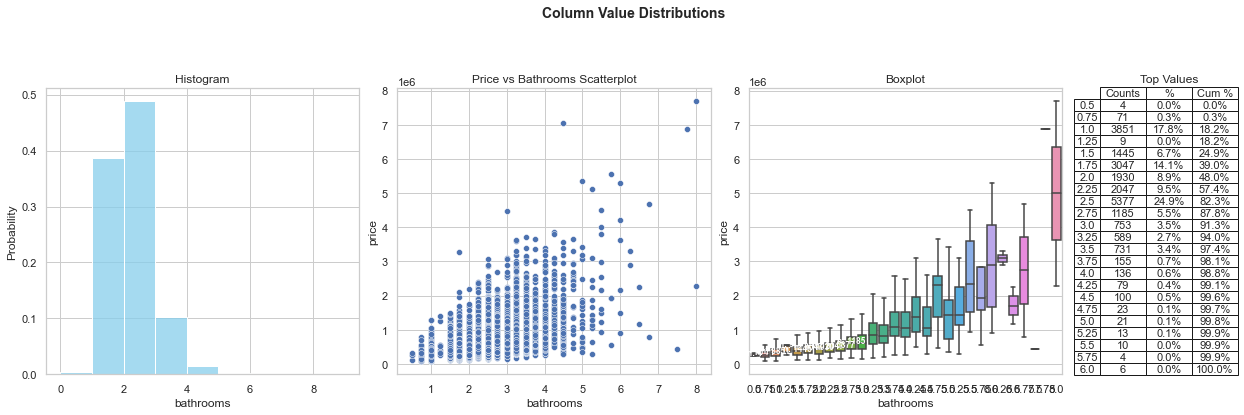

In [41]:
distplots(kc, 'bathrooms', 'price', 23)

**Notes on Bathrooms**
- Over 50% of homes have quarter or half bathrooms listed (.25, .5 or .75); Are half-baths worth 50% of a bath count in regression?
- Roughly 49% home have 2-3 baths, another 39% have 1-2 baths; 98% have 3 baths or under.
- Outliers: 75 homes (0.3%) have less than 1 bathroom. 12 homes have 6 or more. If bathrooms in model, might drop both outliers (1-6 baths).
- Distribution looks skewed right, might need log transformation.
- Median price increases with bathrooms, linear if not exponetially.

#### Floors

/Users/cutterback/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Top 10 Counts By Floors


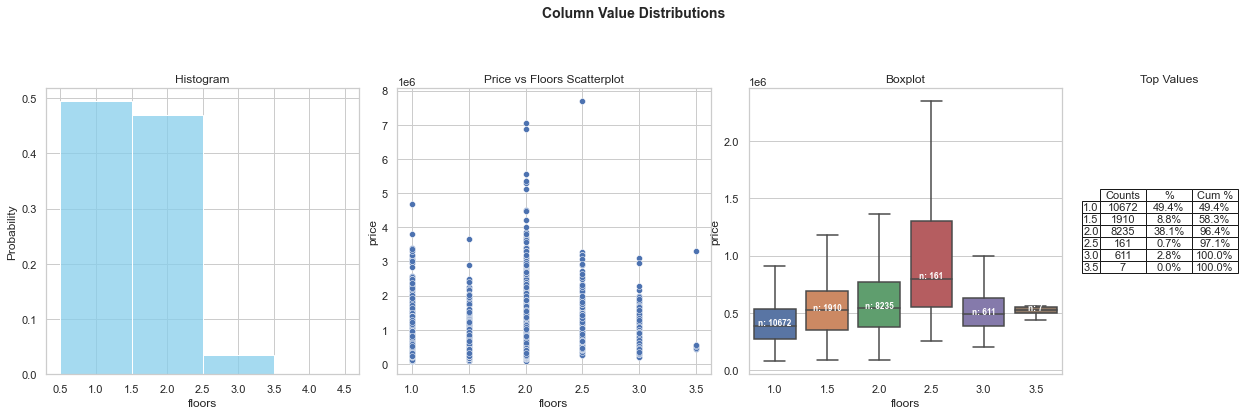

In [42]:
distplots(kc, 'floors', 'price', 10)

**Notes on Floors**
- Approximately 10% of homes have split-levels; Are half-floors worth 50% of a floor in regression?
- Roughly 49% home have single floor, another 38% have 2; Only 3% have 3 floors or higher (small samples and prices don't scale).
- Outliers: None
- Distribution not normal, would use category OHE variables.
- Median price and upper whisker band increases linearly with floors until 3+. Split level 1.5 similar to 2 floors in pricing.

#### Condition

/Users/cutterback/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Top 10 Counts By Condition


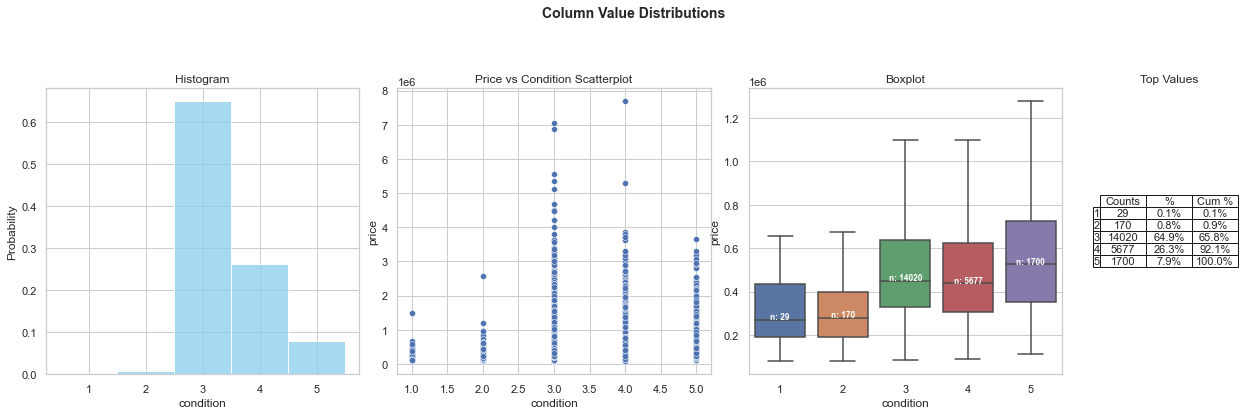

In [43]:
distplots(kc, 'condition', 'price', 5)

**Notes on Condition**
- From data dictionary: Score of 1/2 indicate major repairs required. Score 3 is average, with 4/5 be above average and exceptional.
- Roughly 2/3rd of homes are average (3), 1/4 are above average (4) and top 8% score excellent (5).
- Only 1% have 1/2 scores, probably due to market requirements to have a functional home to list for sale.
- Outliers: None denoted
- Distribution skewed left, candidate for category feature using OHE.
- Median price and IQR bands exhibit increasing step functions: 1/2 cluster-->3/4 cluster-->5

#### Grade

/Users/cutterback/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Top 10 Counts By Grade


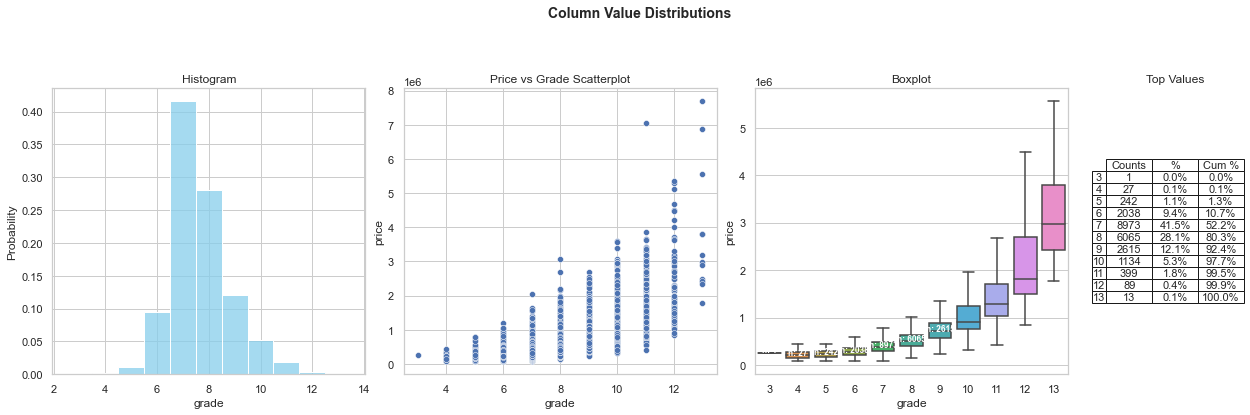

In [44]:
distplots(kc, 'grade', 'price', 13)

**Notes on Grade**
- From data dictionary: Range from 1-13 as an indication of quality level of building. 1-3 unfit, 13 mansion, 7 average.
- Roughly 41% of homes are average (7), another 37% at 6 or 8. Top 20% are 9+.
- Outliers: None denoted
- Distribution appears farily normal, candidate for continuous variable without log transformation.
- Median price and IQR bands exhibit exponetialality, pivoting at 9-13 markedly upwards.

#### Waterfront

/Users/cutterback/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Top 10 Counts By Waterfront


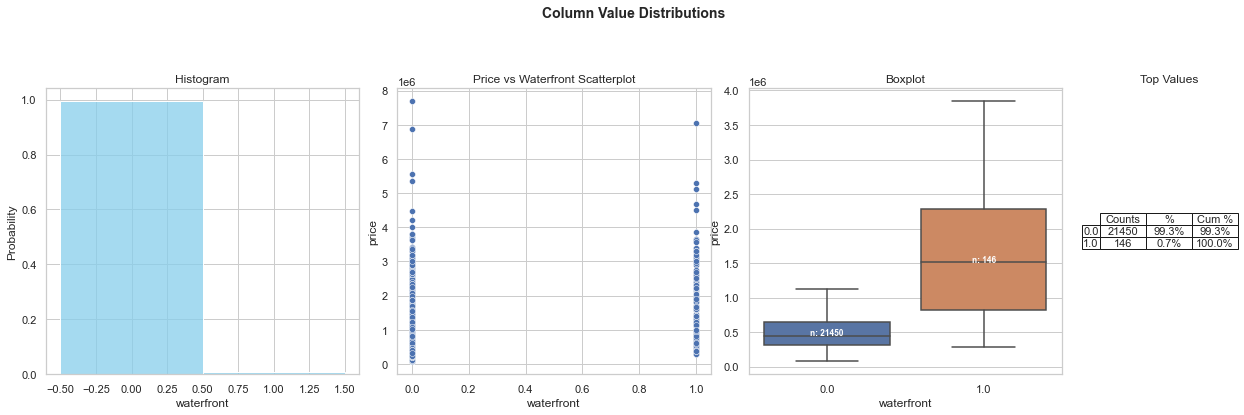

In [45]:
distplots(kc, 'waterfront', 'price', 10)

**Notes on Waterfront**
- Small sample of 146 but nearly triple the prices with high skew higher

#### Renovation Ind

/Users/cutterback/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Top 10 Counts By Renovation_Ind


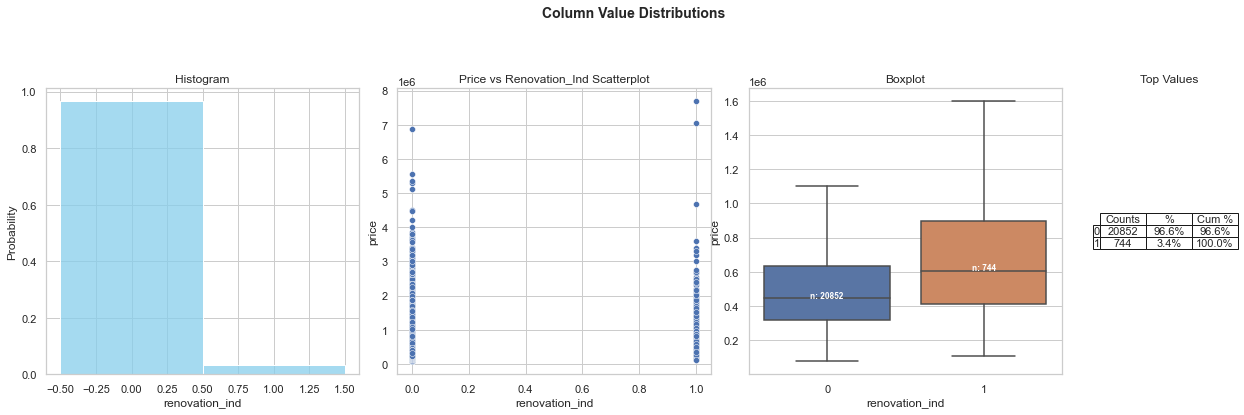

In [46]:
distplots(kc, 'renovation_ind', 'price', 10)

**Notes on Renovation Indicator**
- Small sample of 744 but median price is ~25% higher

#### View

/Users/cutterback/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Top 10 Counts By View


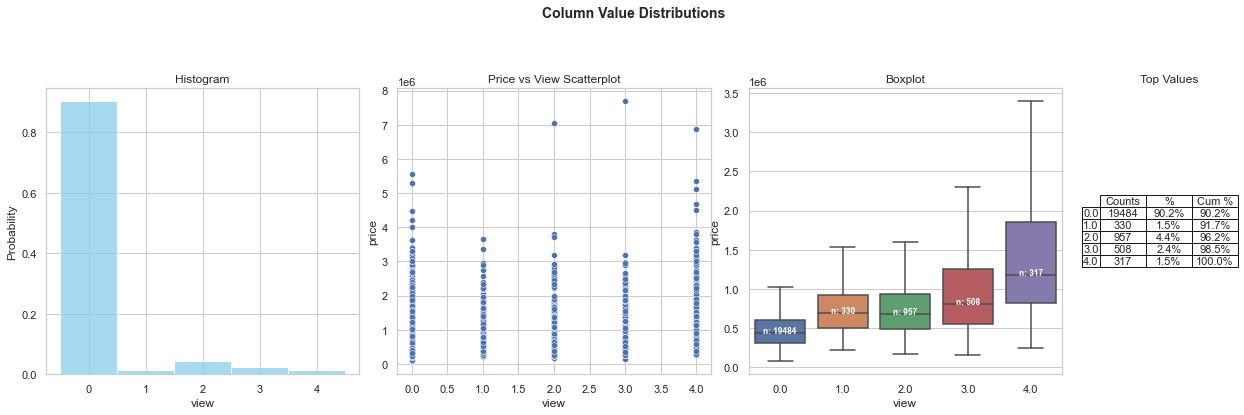

In [47]:
distplots(kc, 'view', 'price', 10)
plt.show()

**Notes on View**
- Only about 10% have a view value but media prices definitely get a lift, especially views 3/4

#### Zip

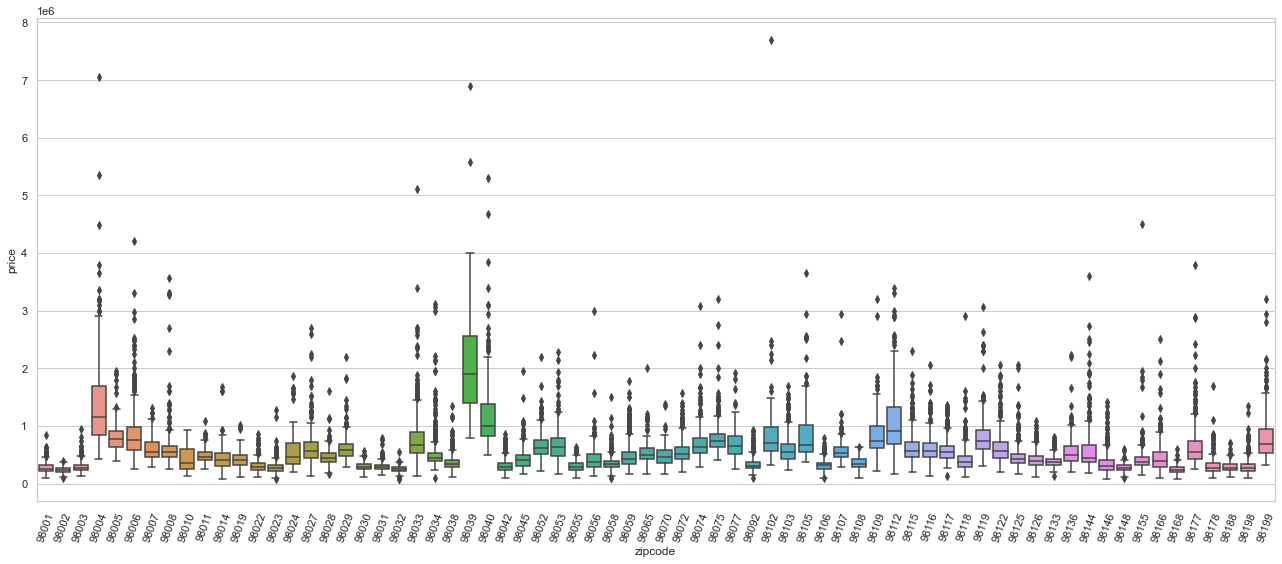

In [48]:
# Boxplot showing distributions of sales price by zipcode
plt.figure(figsize=(18,8))
sns.boxplot(data=kc, x='zipcode', y='price')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

**Notes on Zip**
- 70 distinct zip codes
- Zipcode definitely influence prices and price distributions
- Medians above \\$1M: 3 zips, Upper Whiskers above \\$1M: 8
- Outliers above \\$4M: 6 zips 

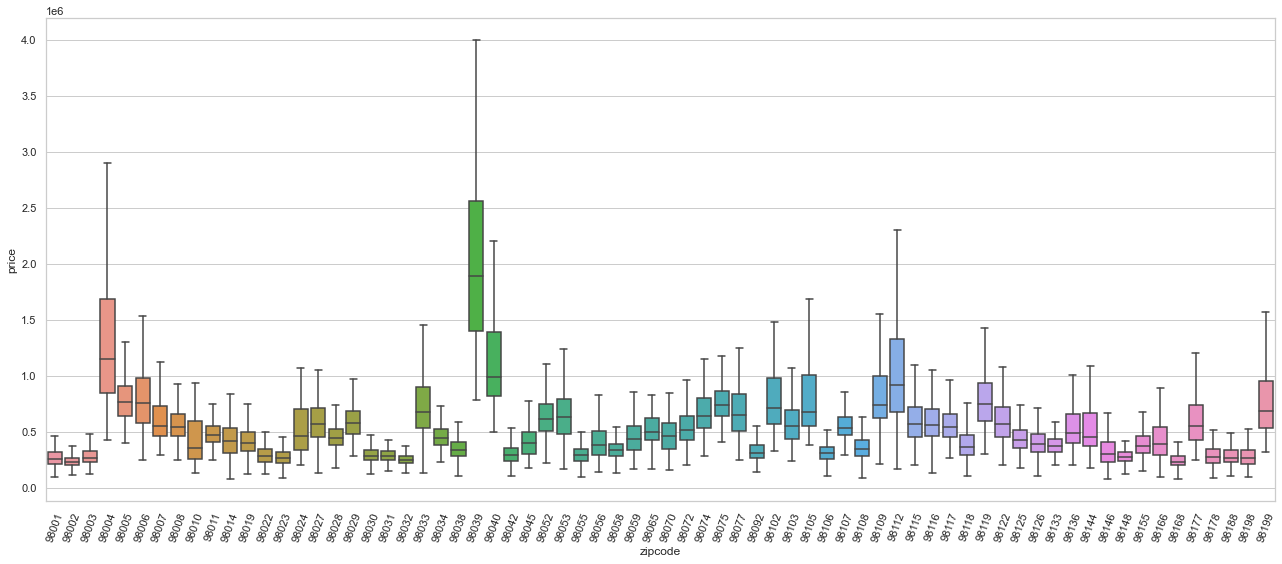

In [49]:
# Boxplot showing distributions of sales price by zipcode (no outliers shown)
plt.figure(figsize=(18,8))
sns.boxplot(data=kc, x='zipcode', y='price', showfliers=False)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

### Continuous Profiles

In [62]:
# Columns on which to generate histograms to distribution exploration
pair_col1 = ['price','price_log','floors','bedrooms','bathrooms','waterfront','view','condition','grade','basement_ind','yr_built','renovation_ind']
pair_col2 = ['price','price_log','sqft_living','sqft_living_log','sqft_lot','sqft_lot_log','sqft_above','sqft_basement','sqft_living15','sqft_lot15','sqft_lot15_log']

# function for scatterplot and diagonal histogram matrix for list of columns
def pairplot(df, column_list):
    g = sns.pairplot(df[column_list], palette='Set2', kind='scatter', diag_kind='kde', height=1)

#### Pairgrid 1

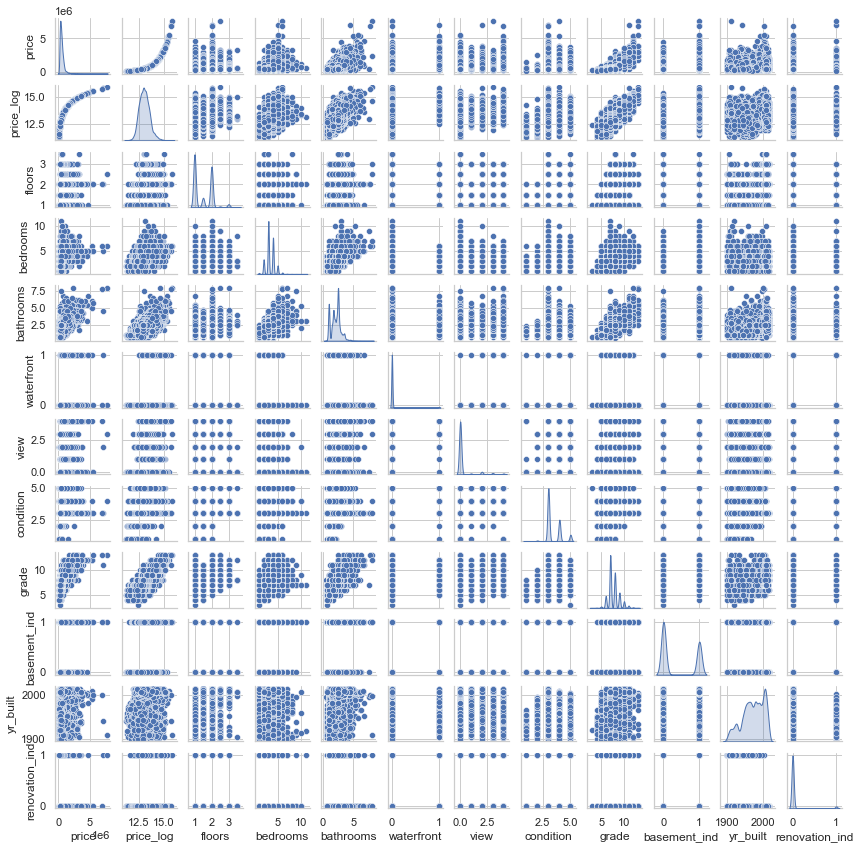

In [63]:
# plot the pairgrid for column set #1
pairplot(kc, pair_col1)

**Notes of Pairgrid 1**
- sqft_living and sqft_above have linear relations to price, pairplot between them definitely colinear
- sqft_lot doesn't seem to matter much to price, but let's check for extreme outliers to see if they impact

#### Pairgrid 2

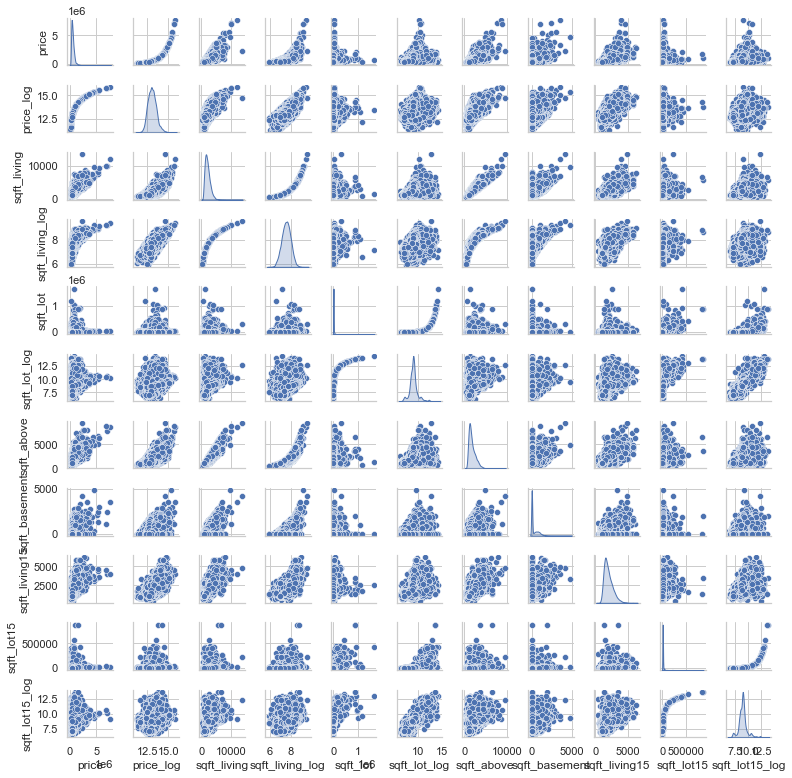

In [64]:
# plot the pairgrid for column set #2
pairplot(kc, pair_col2)

**Notes of Pairgrid 2**
- sqft_living15 (nearest 15 neighbors) has linear relations to price, but also to sqft_living (with more spread). Check collinearity
- sqft_lot15 doesn't seem to matter much to price

# Data Preparation

### Correlations

In [65]:
corr = kc.corr()
corr

,id,price,price_log,bedrooms,bathrooms,sqft_living,sqft_living_log,sqft_lot,sqft_lot_log,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,basement_ind,yr_built,yr_renovated,renovation_ind,lat,long,sqft_living15,sqft_lot15,sqft_lot15_log,sales_cnt
id,1.00,-0.02,-0.00,0.00,0.01,-0.01,-0.00,-0.13,-0.15,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.00,0.00,0.02,-0.01,-0.01,-0.00,0.02,-0.00,-0.14,-0.15,nan
price,-0.02,1.00,0.89,0.32,0.53,0.70,0.61,0.09,0.16,0.26,0.26,0.39,0.04,0.67,0.61,0.32,0.18,0.05,0.12,0.12,0.31,0.02,0.59,0.08,0.15,nan
price_log,-0.00,0.89,1.00,0.35,0.55,0.70,0.67,0.10,0.14,0.31,0.17,0.34,0.04,0.70,0.60,0.31,0.21,0.08,0.11,0.11,0.45,0.05,0.62,0.09,0.12,nan
bedrooms,0.00,0.32,0.35,1.00,0.53,0.59,0.64,0.03,0.19,0.18,-0.00,0.08,0.02,0.37,0.49,0.30,0.16,0.16,0.02,0.02,-0.01,0.14,0.40,0.03,0.17,nan
bathrooms,0.01,0.53,0.55,0.53,1.00,0.76,0.76,0.09,0.10,0.50,0.06,0.19,-0.13,0.67,0.69,0.28,0.16,0.51,0.05,0.05,0.02,0.22,0.57,0.09,0.09,nan
sqft_living,-0.01,0.70,0.70,0.59,0.76,1.00,0.95,0.17,0.34,0.35,0.10,0.28,-0.06,0.76,0.88,0.43,0.20,0.32,0.05,0.05,0.05,0.24,0.76,0.18,0.32,nan
sqft_living_log,-0.00,0.61,0.67,0.64,0.76,0.95,1.00,0.15,0.33,0.37,0.08,0.24,-0.05,0.74,0.83,0.42,0.23,0.35,0.05,0.05,0.04,0.26,0.74,0.16,0.30,nan
sqft_lot,-0.13,0.09,0.10,0.03,0.09,0.17,0.15,1.00,0.64,-0.00,0.02,0.08,-0.01,0.11,0.18,0.02,-0.03,0.05,0.00,0.01,-0.09,0.23,0.14,0.72,0.55,nan
sqft_lot_log,-0.15,0.16,0.14,0.19,0.10,0.34,0.33,0.64,1.00,-0.24,0.07,0.12,0.07,0.18,0.33,0.09,-0.05,-0.01,0.02,0.02,-0.15,0.38,0.36,0.62,0.92,nan
floors,0.02,0.26,0.31,0.18,0.50,0.35,0.37,-0.00,-0.24,1.00,0.02,0.03,-0.26,0.46,0.52,-0.24,-0.25,0.49,0.00,0.00,0.05,0.13,0.28,-0.01,-0.23,nan


In [66]:
corr['price'].sort_values(ascending=False)

price              1.00
price_log          0.89
sqft_living        0.70
grade              0.67
sqft_living_log    0.61
sqft_above         0.61
sqft_living15      0.59
bathrooms          0.53
view               0.39
sqft_basement      0.32
bedrooms           0.32
lat                0.31
waterfront         0.26
floors             0.26
basement_ind       0.18
sqft_lot_log       0.16
sqft_lot15_log     0.15
yr_renovated       0.12
renovation_ind     0.12
sqft_lot           0.09
sqft_lot15         0.08
yr_built           0.05
condition          0.04
long               0.02
id                -0.02
sales_cnt           nan
Name: price, dtype: float64

**Notes on Price Correlation**
- Strong correlations (0.6-0.8): sqft_living, grade, sqft_above
- Moderate correlations (0.4-0.6): sqft_living15, bathrooms, view

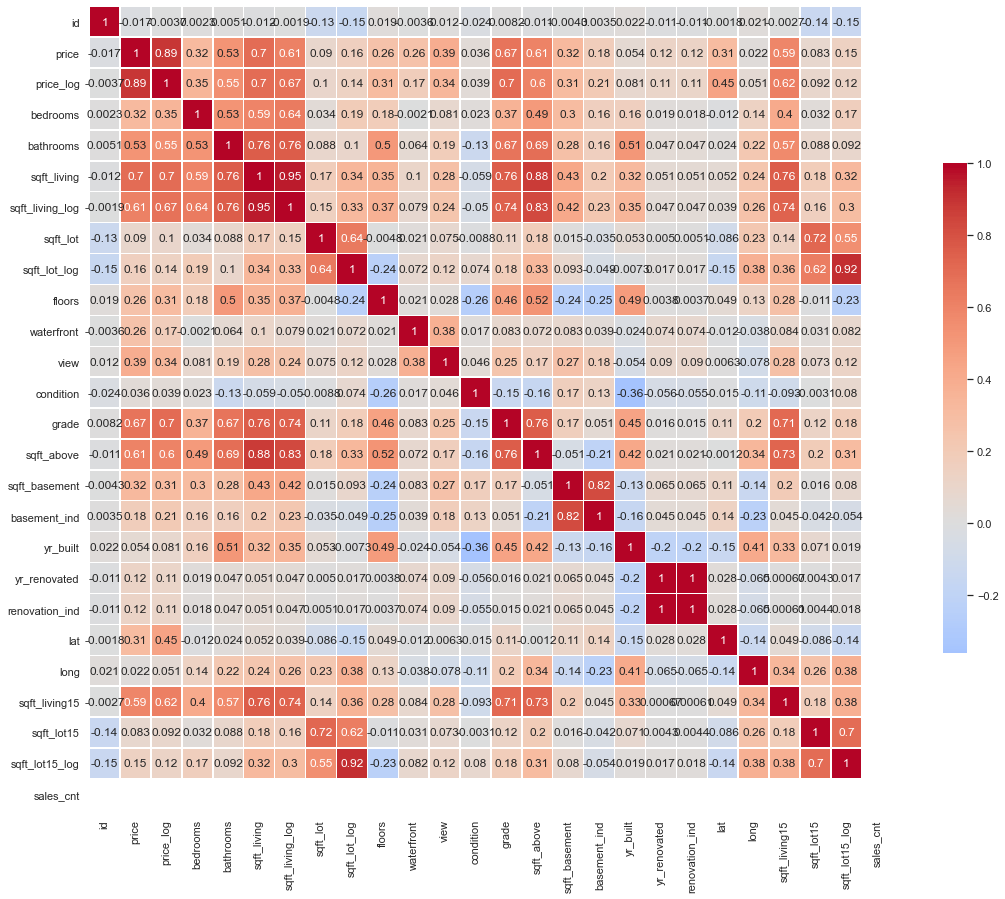

In [83]:
f, ax = plt.subplots(figsize=(18,15))
sns.heatmap(corr, center=0, linewidths=0.4, cmap='coolwarm', square=True, annot=True, cbar_kws={'shrink': 0.6})
plt.show()

### Multi-Colinearity

In [81]:
# Check for collinearity among potential predicator values by pairs
df=corr.stack().reset_index().sort_values(0, ascending=False)
# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
# set index to pairs
df.set_index(['pairs'], inplace = True)
#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)
# rename correlation column as cc rather than 0
df.columns = ['correlation']
# drop duplicates
df.drop_duplicates(inplace=True)
df[abs(df.correlation) > .65]

,correlation
pairs,
"(id, id)",1.00
"(yr_renovated, renovation_ind)",1.00
"(sqft_living, sqft_living_log)",0.95
"(sqft_lot_log, sqft_lot15_log)",0.92
"(price_log, price)",0.89
"(sqft_above, sqft_living)",0.88
"(sqft_above, sqft_living_log)",0.83
"(sqft_basement, basement_ind)",0.82
"(grade, sqft_living)",0.76


**Notes on multi-colinearity**
- Ignore logs of columns compared to source column.
- Probably don't need sqft_living and sqft_above (0.88) as highly duplicatative.
- sqft_living and grade at 0.76 leave in for now (grade should be independent of sqft)
- sqft_living and bathrooms at 0.76 leave in for now (common knowledge pricing is set by # bathrooms somewhat independent of sqft?)
- Bathrooms and grade at 0.67, leave for now perhaps look at interaction term.

### One-hot encoding

In [86]:
# Convert category variables data type
categoricals= ['waterfront','view','condition','grade','renovation_ind','basement_ind','zipcode']
kc[categoricals] = kc[categoricals].astype('category')

In [87]:
# one hot encode categoricals
kc_ohe = pd.get_dummies(kc[categoricals], drop_first=True)
kc_ohe.head()

,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,renovation_ind_1,basement_ind_1,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
# Concatenate OHE columns with original dataframe, dropping OHE original features
kc_comb = pd.concat([kc, kc_ohe], axis=1)
kc_comb.drop(['waterfront','view','condition','grade','renovation_ind','basement_ind','zipcode'], axis=1, inplace=True)
# Drop columns that won't be used at all
kc_comb.drop(['id','date','lat','long'], axis=1, inplace=True)
kc_comb.head()

,price,price_log,bedrooms,bathrooms,sqft_living,sqft_living_log,sqft_lot,sqft_lot_log,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,sqft_lot15_log,sales_cnt,year_month,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,renovation_ind_1,basement_ind_1,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,"221,900.00",12.31,3,1.00,1180,7.07,5650,8.64,1.00,1180,0,1955,0,1340,5650,8.64,1,2014-10,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,"538,000.00",13.20,3,2.25,2570,7.85,7242,8.89,2.00,2170,400,1951,1991,1690,7639,8.94,1,2014-12,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"180,000.00",12.10,2,1.00,770,6.65,10000,9.21,1.00,770,0,1933,0,2720,8062,8.99,1,2015-02,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"604,000.00",13.31,4,3.00,1960,7.58,5000,8.52,1.00,1050,910,1965,0,1360,5000,8.52,1,2014-12,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,"510,000.00",13.14,3,2.00,1680,7.43,8080,9.00,1.00,1680,0,1987,0,1800,7503,8.92,1,2015-02,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Normalize Feature

In [90]:
# normalize a feature (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

### Train-Test Split

In [92]:
# Divide dataset into X predictors and y target
X = kc_comb.drop(['price','price_log'], axis=1)
y = kc_comb[['price','price_log']]

In [93]:
# Split the data into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [119]:
# Validate rows in splits look as expected
print(len(X_train), len(X_test), len(y_train), len(y_test))

17276 4320 17276 4320


# Models

In [95]:
# Use to choose features for this model
print(X_train.columns.tolist())

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_living_log', 'sqft_lot', 'sqft_lot_log', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'sqft_lot15_log', 'sales_cnt', 'year_month', 'waterfront_1.0', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0', 'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'renovation_ind_1', 'basement_ind_1', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_9805

## Functions

### calc_sm_ols

In [163]:
# Function takes X and y dataframes and generates statsmodel OLS results
def calc_sm_ols(model_nbr, X, y):
    '''Takes in X predictors and y target dataframes, generates statsmodel OLS model, predictions and summary stats'''
    X_int = sm.add_constant(X)
    model = sm.OLS(y, X_int).fit()
    print(model.summary())
    
    # generate model predictions and calculate errors 
    y_pred = model.predict(X_int)
    rmse = round(ev.rmse(y, y_pred))
    mae = round(ev.meanabs(y, y_pred))
    print(f'\nModel {model_nbr} Summary Statistics')
    print(f'Root Mean Squared Error (RMSE): {rmse}.')
    print(f'Mean Absolute Error (MAE): {mae}.')
    
    return model

## Model 1

### Approach & Setup

**Model 1 Approach**
- This model is a baseline model that we'll build on in future iterations with more complexity and features
- Model 1 will start without use of log columns and solve for price using top correlated columns
- Columns to try include all high (sqft_living, grade, sqft_above) and medium correlations (sqft_living15, bathrooms, view)
- Model 1 will not incorporate much colinearity concerns to start

In [105]:
# Model 1 Setup and call statsmodel function
features_m1 = ['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0', 'grade_4', 
               'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13']
X_train_m1 = X_train[features_m1]
y_train_m1 = y_train['price']
X_train_m1.head()

,sqft_living,sqft_above,sqft_living15,bathrooms,view_1.0,view_2.0,view_3.0,view_4.0,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
6243,1440,1440,1300,2.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8986,1430,1140,1310,1.75,0,1,0,0,0,0,0,1,0,0,0,0,0,0
9419,3120,3120,3200,2.75,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10155,2060,1220,1760,2.50,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10436,2500,1680,1550,2.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Run OLS

In [164]:
model_1 = calc_sm_ols(model_nbr=1, X=X_train_m1, y=y_train_m1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     1620.
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        08:53:02   Log-Likelihood:            -2.3740e+05
No. Observations:               17276   AIC:                         4.748e+05
Df Residuals:                   17257   BIC:                         4.750e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.839e+05   2.25e+05      0.817

### Review Residuals

In [198]:
# function to generate QQ-plots an OLS model
def qqplot(model_nbr, model):
    '''Receives OLS model as parameter and generates QQ-plots for normality of residuals'''
    # generate QQ-plot
    residuals = model.resid
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    plt.title(f'\nModel {model_nbr} QQ-plot' )
    plt.show()

In [ ]:


def plot_residuals(model_nbr, model):
    '''Receives OLS model as parameter and generates residual plots for each predictor (X) to test for normality of residuals'''
    # loop through variables to show residuals for each
    x_vars = model_1.params.keys().tolist()
    x_vars.remove('const')
    columns=2
    rows = math.ceil(len(x_vars)/columns)
    c = 0  # initialize plot counter
    f = plt.figure()
    ax = f.subplots(nrows=rows, ncols=columns)
    ax = ax.flatten()
    for x in x_vars:
        ax[c] = sm.graphics.plot_regress_exog(model, x, fig=f)
        c = c + 1
    
    plt.show()

    fig, axes = plt.subplots(5, 6, figsize=(16, 8))

# for col, ax in zip(df.columns, axes.flatten()):
#     ax.bar(df.index, df[col])
#     ax.set_title(col)
#     plt.subplots_adjust(wspace=.5, hspace=.5)

In [ ]:
# qqplot(model_nbr=1, model=model_1)
plot_residuals(model_nbr=1, model=model_1)

### K-folds

In [ ]:
# The Goldfeld Quandt (GQ) test is used in regression analysis to check for homoscedasticity in the error terms. The GQ test checks if you can define a point that can be used to differentiate the variance of the error term. It is a parametric test and uses the assumption that the data is normally distributed. So it is general practice to check for normality before going over to the GQ test!
# image below, you can see how observations are split into two groups. Next, a test statistic is run through taking the ratio of mean square residual errors for the regressions on the two subsets. Evidence of heteroscedasticity is based on performing a hypothesis test (more on this later) as shown in the image.

lwr_thresh = data.TV.quantile(q=.45)
upr_thresh = data.TV.quantile(q=.55)
middle_10percent_indices = data[(data.TV >= lwr_thresh) & (data.TV<=upr_thresh)].index
# len(middle_10percent_indices)

indices = [x-1 for x in data.index if x not in middle_10percent_indices]
plt.scatter(data.TV.iloc[indices], model.resid.iloc[indices])
plt.xlabel('TV')
plt.ylabel('Model Residuals')
plt.title("Residuals versus TV Feature")
plt.vlines(lwr_thresh, ymax=8, ymin=-8, linestyles='dashed',linewidth=2)
plt.vlines(upr_thresh, ymax=8, ymin=-8, linestyles='dashed',linewidth=2);

In [ ]:
# Here is a brief description of the steps involved:

# Order the data in ascending order
# Split your data into three parts and drop values in the middle part.
# Run separate regression analyses on two parts. After each regression, find the Residual Sum of Squares.
# Calculate the ratio of the Residual sum of squares of two parts.
# Apply the F-test.

# Run Goldfeld Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid.iloc[indices], model.model.exog[indices])
list(zip(name, test))

# Model Evaluation

# Business Analysis

# Deployment

# Appendix